In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Evaluation of the LAMP framework
To start, transform and evaluate the lottie-android
```
# Clone and checkout
cd input && git clone https://github.com/airbnb/lottie-android.git && git checkout 4794facf && cd ..

# In the TUI:
transform -in input/lottie-android/lottie/src/main/java -out out/lottie
evaluate -in out/lottie -out evaluation/data/lamp-lottie
```

# Designite Metrics

In [335]:
df_types = pd.read_csv('data/designite-lottie/TypeMetrics.csv', usecols=["Package Name", "Type Name", "NOF", "NOM", "NOPF", "NOPM", "LOC", "WMC", "NC", "DIT", "LCOM", "FANIN", "FANOUT"])
df_types.insert(0, "DeclarableId", df_types[['Package Name', 'Type Name']].agg('.'.join, axis=1))
df_types.drop(["Package Name", "Type Name"], axis="columns", inplace=True)

df_methods = pd.read_csv('data/designite-lottie/MethodMetrics.csv', usecols=["Package Name", "Type Name", "Method Name", "LOC", "CC", "PC"])
df_methods.insert(0, "DeclarableId", df_methods[['Package Name', 'Type Name']].agg('.'.join, axis=1))
df_methods["DeclarableId"] = df_methods[['DeclarableId', 'Method Name']].agg('://'.join, axis=1)
df_methods.drop(["Package Name", "Type Name", "Method Name"], axis="columns", inplace=True)

In [336]:
print(df_types)

                                          DeclarableId  NOF  NOPF  NOM  NOPM  \
0                         com.airbnb.lottie.LottieTask    5     1   10     5   
1        com.airbnb.lottie.LottieTask.LottieFutureTask    0     0    0     0   
2                         com.airbnb.lottie.RenderMode    0     0    0     0   
3                             com.airbnb.lottie.Lottie    0     0    2     1   
4    com.airbnb.lottie.LottieOnCompositionLoadedLis...    0     0    1     0   
..                                                 ...  ...   ...  ...   ...   
217            com.airbnb.lottie.model.layer.NullLayer    0     0    3     1   
218           com.airbnb.lottie.model.layer.ShapeLayer    2     0    6     3   
219                com.airbnb.lottie.model.layer.Layer   24     0   27    10   
220      com.airbnb.lottie.model.layer.Layer.LayerType    0     0    0     0   
221      com.airbnb.lottie.model.layer.Layer.MatteType    0     0    0     0   

     LOC  WMC  NC  DIT  LCOM  FANIN  FA

In [337]:
print(df_methods)

                                           DeclarableId  LOC  CC  PC
0             com.airbnb.lottie.LottieTask://LottieTask    3   1   1
1             com.airbnb.lottie.LottieTask://LottieTask   13   2   2
2              com.airbnb.lottie.LottieTask://setResult    7   2   1
3            com.airbnb.lottie.LottieTask://addListener    8   2   1
4         com.airbnb.lottie.LottieTask://removeListener    4   1   1
...                                                 ...  ...  ..  ..
1349     com.airbnb.lottie.model.layer.Layer://toString    3   1   0
1350     com.airbnb.lottie.model.layer.Layer://isHidden    3   1   0
1351  com.airbnb.lottie.model.layer.Layer://getBlurE...    3   1   0
1352  com.airbnb.lottie.model.layer.Layer://getDropS...    3   1   0
1353     com.airbnb.lottie.model.layer.Layer://toString   27   7   1

[1354 rows x 4 columns]


# SonarQube metrics

In [338]:
df_sonar = pd.read_csv('data/sonarqube-lottie/CognitiveComplexity.csv', usecols=["DeclarableId","S_COCO", "S_LOC"])
df_sonar['DeclarableId'] = df_sonar['DeclarableId'].astype(str)
pd.to_numeric(df_sonar['S_COCO'])
pd.to_numeric(df_sonar['S_LOC'])
print(df_sonar)

                                          DeclarableId  S_COCO  S_LOC
0    com.airbnb.lottie.animation.content.BaseStroke...     104    347
1    com.airbnb.lottie.animation.content.CompoundTr...       1     16
2          com.airbnb.lottie.animation.content.Content       0      6
3     com.airbnb.lottie.animation.content.ContentGroup      58    222
4    com.airbnb.lottie.animation.content.DrawingCon...       0      8
..                                                 ...     ...    ...
184  com.airbnb.lottie.value.LottieRelativeIntegerV...       1     22
185  com.airbnb.lottie.value.LottieRelativePointVal...       1     36
186        com.airbnb.lottie.value.LottieValueCallback       1     53
187                    com.airbnb.lottie.value.ScaleXY       1     28
188  com.airbnb.lottie.value.SimpleLottieValueCallback       0      4

[189 rows x 3 columns]


# LAMP Metrics

In [339]:
df_modules = pd.read_csv('data/lamp-lottie/modules.csv', usecols=["DeclarableId","MLOC","WMC","CWMC","DIT","NOC","CBO","RFC","LCOM","NOU","LC"])
df_units = pd.read_csv('data/lamp-lottie/units.csv', usecols=["DeclarableId","ULOC","CC","COCO","PC","LLOC"])

In [340]:
df_modules.sort_values(by=["DeclarableId"])
print(df_modules)

                                          DeclarableId  MLOC  WMC  CWMC  DIT  \
0    com.airbnb.lottie.animation.keyframe.PathKeyfr...    31    6     5    2   
1          com.airbnb.lottie.manager.ImageAssetManager   107   26    21    0   
2        com.airbnb.lottie.model.content.GradientColor    52   13     6    0   
3              com.airbnb.lottie.parser.KeyframeParser   280   81   115    0   
4              com.airbnb.lottie.network.FileExtension    14    3     0    0   
..                                                 ...   ...  ...   ...  ...   
184     com.airbnb.lottie.parser.AnimatableValueParser    52   13     1    0   
185  com.airbnb.lottie.animation.keyframe.Transform...   278   99   107    0   
186        com.airbnb.lottie.model.content.CircleShape    33    7     0    0   
187  com.airbnb.lottie.animation.keyframe.MaskKeyfr...    24    5     1    0   
188  com.airbnb.lottie.animation.content.RoundedCor...   129   39    35    0   

     NOC  CBO  RFC  LCOM  NOU  LC  
0  

In [341]:
print(df_units)

                                           DeclarableId  ULOC  CC  COCO  PC  \
0     com.airbnb.lottie.animation.keyframe.PathKeyfr...     3   1     0   1   
1     com.airbnb.lottie.animation.keyframe.PathKeyfr...    22   5     5   2   
2     com.airbnb.lottie.manager.ImageAssetManager://...    15   5     4   4   
3     com.airbnb.lottie.manager.ImageAssetManager://...     3   1     0   1   
4     com.airbnb.lottie.manager.ImageAssetManager://...    11   2     1   2   
...                                                 ...   ...  ..   ...  ..   
1335  com.airbnb.lottie.animation.content.RoundedCor...     3   1     0   0   
1336  com.airbnb.lottie.animation.content.RoundedCor...    67  15    17   1   
1337  com.airbnb.lottie.animation.content.RoundedCor...    27  15    16   1   
1338  com.airbnb.lottie.animation.content.RoundedCor...     3   1     0   2   
1339  com.airbnb.lottie.animation.content.RoundedCor...     7   3     2   2   

      LLOC  
0        0  
1        0  
2        0  

## Distribution analysis

In [342]:
print(df_modules.describe())

             MLOC         WMC        CWMC         DIT         NOC         CBO  \
count  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000   
mean    73.719577   18.835979   12.783069    0.328042    0.222222   35.455026   
std    122.677100   35.139230   29.956361    0.590984    1.063582   62.249877   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     14.000000    3.000000    0.000000    0.000000    0.000000    5.000000   
50%     36.000000    8.000000    2.000000    0.000000    0.000000   11.000000   
75%     76.000000   17.000000    9.000000    1.000000    0.000000   41.000000   
max    887.000000  272.000000  222.000000    2.000000    8.000000  355.000000   

              RFC        LCOM         NOU          LC  
count  189.000000  189.000000  189.000000  189.000000  
mean    14.063492    1.566138    7.089947    0.164021  
std     22.724441    0.952107   12.258621    1.368170  
min      0.000000    0.000000    0.000000    0

Within the codebase, inheritance and lambdas are rarely used.

Let's deepdive into lambdas that are used.

In [343]:
df_lambda = df_modules.loc[df_modules["LC"] > 0][['DeclarableId', 'LC']]
print(df_lambda)

                                   DeclarableId  LC
43        com.airbnb.lottie.LottieAnimationView   3
100                com.airbnb.lottie.LottieTask   1
113            com.airbnb.lottie.LottieDrawable  15
134  com.airbnb.lottie.LottieCompositionFactory  11
153     com.airbnb.lottie.model.layer.BaseLayer   1


Lambdas are used in 5 places of the code base. These lambda statements were very short. Only describing a call to another method.

In [344]:
print(df_units.describe())

              ULOC           CC         COCO           PC         LLOC
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000
mean      8.641791     2.656716     1.802985     1.193284     0.049254
std      12.331253     3.901905     5.042759     1.646718     0.582768
min       1.000000     1.000000     0.000000     0.000000     0.000000
25%       3.000000     1.000000     0.000000     0.000000     0.000000
50%       3.000000     1.000000     0.000000     1.000000     0.000000
75%       9.000000     3.000000     2.000000     2.000000     0.000000
max     151.000000    47.000000    89.000000    24.000000    15.000000


# Analysing module differences

In [345]:
module_diff = pd.concat([df_types["DeclarableId"], df_modules["DeclarableId"]]).drop_duplicates(keep=False)
print(module_diff)

1          com.airbnb.lottie.LottieTask.LottieFutureTask
6            com.airbnb.lottie.LottieComposition.Factory
7      com.airbnb.lottie.LottieComposition.ListenerAd...
13      com.airbnb.lottie.LottieAnimationView.SavedState
14     com.airbnb.lottie.LottieAnimationView.UserActi...
19     com.airbnb.lottie.PerformanceTracker.FrameList...
22     com.airbnb.lottie.LottieDrawable.LazyCompositi...
23      com.airbnb.lottie.LottieDrawable.OnVisibleAction
29                com.airbnb.lottie.LottieConfig.Builder
73     com.airbnb.lottie.animation.content.BaseStroke...
84     com.airbnb.lottie.animation.keyframe.BaseKeyfr...
85     com.airbnb.lottie.animation.keyframe.BaseKeyfr...
86     com.airbnb.lottie.animation.keyframe.BaseKeyfr...
87     com.airbnb.lottie.animation.keyframe.BaseKeyfr...
88     com.airbnb.lottie.animation.keyframe.BaseKeyfr...
148    com.airbnb.lottie.parser.moshi.LinkedHashTreeM...
149    com.airbnb.lottie.parser.moshi.LinkedHashTreeM...
150    com.airbnb.lottie.parser

33 Modules aren't support by the LAMP framework due to inner modules not being supported.

In [346]:
unit_diff = pd.concat([df_methods["DeclarableId"], df_units["DeclarableId"].apply(lambda s: s.split("$")[0])]).drop_duplicates(keep=False)
print(unit_diff)

10                      com.airbnb.lottie.Lottie://Lottie
48       com.airbnb.lottie.LottieAnimationView://onResult
131      com.airbnb.lottie.LottieAnimationView://getValue
154     com.airbnb.lottie.SimpleColorFilter://SimpleCo...
155        com.airbnb.lottie.PerformanceTracker://compare
                              ...                        
1297    com.airbnb.lottie.parser.AnimatableValueParser...
1309    com.airbnb.lottie.animation.keyframe.Transform...
1320    com.airbnb.lottie.model.content.CircleShape://...
1327    com.airbnb.lottie.animation.keyframe.MaskKeyfr...
1331    com.airbnb.lottie.animation.content.RoundedCor...
Name: DeclarableId, Length: 261, dtype: object


261 Units aren't recognized by the LAMP framework at a first glance. When looking at each method precisely, we see that constructors and initializers aren't being matched by name due to their naming conventions within the LAMP framework.

In [347]:
unit_diff_with_constructors = pd.concat([df_methods["DeclarableId"], df_units["DeclarableId"].apply(lambda s:
                                                                                                        s.split("$")[0].removesuffix(".constructor").removesuffix(".initializer")
                                                                                                    )]).drop_duplicates(keep=False)
print(unit_diff_with_constructors)

48       com.airbnb.lottie.LottieAnimationView://onResult
131      com.airbnb.lottie.LottieAnimationView://getValue
155        com.airbnb.lottie.PerformanceTracker://compare
163     com.airbnb.lottie.LottieDrawable://onAnimation...
255           com.airbnb.lottie.LottieDrawable://getValue
344                     com.airbnb.lottie.L://getCacheDir
610     com.airbnb.lottie.animation.keyframe.DropShado...
898     com.airbnb.lottie.parser.moshi.LinkedHashTreeM...
1106    com.airbnb.lottie.model.content.MergePaths://f...
1158    com.airbnb.lottie.model.content.ShapeTrimPath:...
1189    com.airbnb.lottie.model.content.PolystarShape:...
1190    com.airbnb.lottie.model.content.PolystarShape:...
1212    com.airbnb.lottie.model.content.ShapeStroke://...
1213    com.airbnb.lottie.model.content.ShapeStroke://...
24      com.airbnb.lottie.network.FileExtension://File...
25      com.airbnb.lottie.network.FileExtension://temp...
26      com.airbnb.lottie.network.FileExtension://toSt...
660     com.ai

After removing the .constructor and .initializer from the declarable id, we see that these units are now matched to their corresponding method ids from designite.
This leaves us with the analysis of the remaining 18 units that aren't getting matched. These are units:

- Enum declarations by the LAMP framework, these aren't evaluated by Designite.
- Anonymous class declarations: these aren't evaluated by the LAMP framework
- Inner Module Units: these aren't evaluated by the LAMP framework.

# Metric performance

In [348]:
types = df_types
methods = df_methods

mods = df_modules
units = df_units

types.rename(columns=lambda x: "D_" + x, inplace=True)
types.rename({"D_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

methods.rename(columns=lambda x: "D_" + x, inplace=True)
methods.rename({"D_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

mods.rename(columns=lambda x: "L_" + x, inplace=True)
mods.rename({"L_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

units.rename(columns=lambda x: "L_" + x, inplace=True)
units.rename({"L_DeclarableId": "DeclarableId"}, axis=1, inplace=True)
units["DeclarableId"] = units["DeclarableId"].apply(lambda s: s.split("$")[0].removesuffix(".constructor").removesuffix(".initializer"))

In [349]:
m_mods = pd.merge(types, mods, on="DeclarableId")
m_mods = pd.merge(m_mods, df_sonar, on="DeclarableId")
print(m_mods)

                                          DeclarableId  D_NOF  D_NOPF  D_NOM  \
0                         com.airbnb.lottie.LottieTask      5       1     10   
1                         com.airbnb.lottie.RenderMode      0       0      0   
2                             com.airbnb.lottie.Lottie      0       0      2   
3    com.airbnb.lottie.LottieOnCompositionLoadedLis...      0       0      1   
4                  com.airbnb.lottie.LottieComposition     17       0     27   
..                                                 ...    ...     ...    ...   
184            com.airbnb.lottie.model.layer.TextLayer     23       0     21   
185           com.airbnb.lottie.model.layer.SolidLayer      6       0      4   
186            com.airbnb.lottie.model.layer.NullLayer      0       0      3   
187           com.airbnb.lottie.model.layer.ShapeLayer      2       0      6   
188                com.airbnb.lottie.model.layer.Layer     24       0     27   

     D_NOPM  D_LOC  D_WMC  D_NC  D_DIT 

In [350]:
m_units = pd.merge(methods, units, on=["DeclarableId"])
print(m_units)

                                           DeclarableId  D_LOC  D_CC  D_PC  \
0             com.airbnb.lottie.LottieTask://LottieTask      3     1     1   
1             com.airbnb.lottie.LottieTask://LottieTask      3     1     1   
2             com.airbnb.lottie.LottieTask://LottieTask     13     2     2   
3             com.airbnb.lottie.LottieTask://LottieTask     13     2     2   
4              com.airbnb.lottie.LottieTask://setResult      7     2     1   
...                                                 ...    ...   ...   ...   
1540     com.airbnb.lottie.model.layer.Layer://toString     27     7     1   
1541     com.airbnb.lottie.model.layer.Layer://toString     27     7     1   
1542     com.airbnb.lottie.model.layer.Layer://isHidden      3     1     0   
1543  com.airbnb.lottie.model.layer.Layer://getBlurE...      3     1     0   
1544  com.airbnb.lottie.model.layer.Layer://getDropS...      3     1     0   

      L_ULOC  L_CC  L_COCO  L_PC  L_LLOC  
0          3     1  

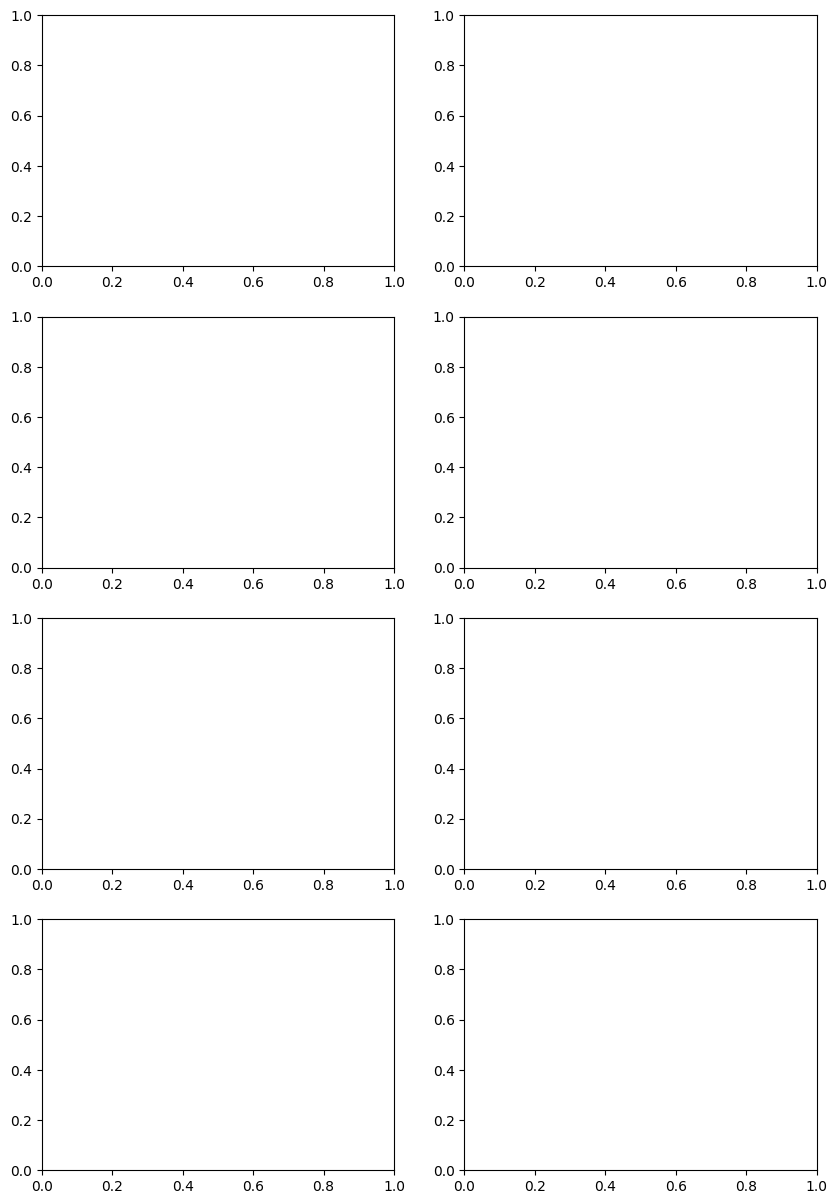

In [351]:
figure, axis = plt.subplots(4, 2, figsize=(10, 15))

## Module Lines Of Code

In [352]:
mloc = m_mods[['DeclarableId', 'D_LOC', 'L_MLOC']]
print(mloc)

                                          DeclarableId  D_LOC  L_MLOC
0                         com.airbnb.lottie.LottieTask    126      96
1                         com.airbnb.lottie.RenderMode      0      21
2                             com.airbnb.lottie.Lottie     19      12
3    com.airbnb.lottie.LottieOnCompositionLoadedLis...      3       3
4                  com.airbnb.lottie.LottieComposition    247     192
..                                                 ...    ...     ...
184            com.airbnb.lottie.model.layer.TextLayer    517     486
185           com.airbnb.lottie.model.layer.SolidLayer     63      63
186            com.airbnb.lottie.model.layer.NullLayer     11      11
187           com.airbnb.lottie.model.layer.ShapeLayer     35      36
188                com.airbnb.lottie.model.layer.Layer    156     179

[189 rows x 3 columns]


In [353]:
x1 = mloc['D_LOC']
# x2 = mloc['S_LOC']
x3 = mloc['L_MLOC']

plt = axis[0, 0]

# Plot
# plt.hist([x1, x2, x3], bins=np.linspace(0, 1000, 30), density=True, color=['#3C5DA1', '#B53941', '#469B55'], label=['Designite', 'SonarQube', 'LAMP'])
plt.hist([x1, x3], bins=np.linspace(0, 1000, 30), density=True, color=['#3C5DA1', '#469B55'], label=['Designite', 'LAMP'])
plt.set(title= "MLOC Distribution", xlabel= 'Module Lines of Code', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-MLOC.png')
# plt.show()

## Module Number Of Units

In [354]:
nou = m_mods[['DeclarableId', 'D_NOM', 'L_NOU']]
print(nou)

                                          DeclarableId  D_NOM  L_NOU
0                         com.airbnb.lottie.LottieTask     10     10
1                         com.airbnb.lottie.RenderMode      0      1
2                             com.airbnb.lottie.Lottie      2      2
3    com.airbnb.lottie.LottieOnCompositionLoadedLis...      1      1
4                  com.airbnb.lottie.LottieComposition     27     27
..                                                 ...    ...    ...
184            com.airbnb.lottie.model.layer.TextLayer     21     21
185           com.airbnb.lottie.model.layer.SolidLayer      4      4
186            com.airbnb.lottie.model.layer.NullLayer      3      3
187           com.airbnb.lottie.model.layer.ShapeLayer      6      6
188                com.airbnb.lottie.model.layer.Layer     27     27

[189 rows x 3 columns]


In [355]:
x1 = m_mods['D_NOM']
x2 = m_mods['L_NOU']

plt = axis[0, 1]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 50, 30), density=True, label=['Designite', 'LAMP'])
plt.set(title= "NOU Distribution", xlabel= 'Number of Units', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-NOU.png')
# plt.show()

## Module Weighted Method per Class (WMC)

In [356]:
wmc = m_mods[['DeclarableId', 'D_WMC', 'L_WMC']]
print(wmc)

                                          DeclarableId  D_WMC  L_WMC
0                         com.airbnb.lottie.LottieTask     19     24
1                         com.airbnb.lottie.RenderMode      0      7
2                             com.airbnb.lottie.Lottie      2      2
3    com.airbnb.lottie.LottieOnCompositionLoadedLis...      1      1
4                  com.airbnb.lottie.LottieComposition     30     30
..                                                 ...    ...    ...
184            com.airbnb.lottie.model.layer.TextLayer     96    130
185           com.airbnb.lottie.model.layer.SolidLayer      9     11
186            com.airbnb.lottie.model.layer.NullLayer      3      3
187           com.airbnb.lottie.model.layer.ShapeLayer      8      8
188                com.airbnb.lottie.model.layer.Layer     33     34

[189 rows x 3 columns]


In [357]:
x1 = m_mods['D_WMC']
x2 = m_mods['L_WMC']


plt = axis[1, 0]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 100, 30), density=True, label=['Designite', 'LAMP'])
plt.set(title= "WMC Distribution", xlabel= 'Weighted Methods per Class', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-WMC.png')
# plt.show()

## Module - Cognitively Weighted Method per Class (CWMC)

In [358]:
cwmc = m_mods[['DeclarableId', 'S_COCO', 'L_CWMC']].copy()
print(cwmc)

                                          DeclarableId  S_COCO  L_CWMC
0                         com.airbnb.lottie.LottieTask      19      17
1                         com.airbnb.lottie.RenderMode       5       5
2                             com.airbnb.lottie.Lottie       0       0
3    com.airbnb.lottie.LottieOnCompositionLoadedLis...       0       0
4                  com.airbnb.lottie.LottieComposition       6       4
..                                                 ...     ...     ...
184            com.airbnb.lottie.model.layer.TextLayer     132     132
185           com.airbnb.lottie.model.layer.SolidLayer       8       8
186            com.airbnb.lottie.model.layer.NullLayer       0       0
187           com.airbnb.lottie.model.layer.ShapeLayer       2       2
188                com.airbnb.lottie.model.layer.Layer       9       9

[189 rows x 3 columns]


In [359]:
cwmc["Diff"] = cwmc["S_COCO"] - cwmc["L_CWMC"]
print(cwmc.loc[cwmc["Diff"] > 5])

                                          DeclarableId  S_COCO  L_CWMC  Diff
15                    com.airbnb.lottie.LottieDrawable     161     152     9
20                      com.airbnb.lottie.LottieConfig       6       0     6
73   com.airbnb.lottie.animation.keyframe.BaseKeyfr...      31      21    10
91     com.airbnb.lottie.parser.DropShadowEffectParser      14       7     7
94                com.airbnb.lottie.parser.LayerParser      63       6    57
98        com.airbnb.lottie.parser.FontCharacterParser      15       2    13
101          com.airbnb.lottie.parser.BlurEffectParser      17       8     9
104  com.airbnb.lottie.parser.AnimatableTransformPa...      34      22    12
106         com.airbnb.lottie.parser.ShapeStrokeParser      23       3    20
108      com.airbnb.lottie.parser.GradientStrokeParser      35       6    29
114        com.airbnb.lottie.parser.GradientFillParser      17       9     8
121            com.airbnb.lottie.parser.KeyframeParser     125     115    10

In [360]:
x1 = m_mods['S_COCO']
x2 = m_mods['L_CWMC']

plt = axis[1, 1]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 100, 30), density=True, color=['#B53941', '#469B55'], label=['SonarQube', 'LAMP'])
plt.set(title= "CWMC Distribution", xlabel= 'Cognitively Weighted Methods per Class', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-CWMC.png')
# plt.show()

## Module Depth of Inheritance (DIT)

In [361]:
dit = m_mods[['DeclarableId', 'D_DIT', 'L_DIT']]
print(dit)

                                          DeclarableId  D_DIT  L_DIT
0                         com.airbnb.lottie.LottieTask      0      0
1                         com.airbnb.lottie.RenderMode      0      0
2                             com.airbnb.lottie.Lottie      0      0
3    com.airbnb.lottie.LottieOnCompositionLoadedLis...      0      0
4                  com.airbnb.lottie.LottieComposition      0      0
..                                                 ...    ...    ...
184            com.airbnb.lottie.model.layer.TextLayer      1      1
185           com.airbnb.lottie.model.layer.SolidLayer      1      1
186            com.airbnb.lottie.model.layer.NullLayer      1      1
187           com.airbnb.lottie.model.layer.ShapeLayer      1      1
188                com.airbnb.lottie.model.layer.Layer      0      0

[189 rows x 3 columns]


In [362]:
dit["Diff"] = dit["D_DIT"] - dit["L_DIT"]
print(dit.loc[dit["Diff"] > 0])

                                          DeclarableId  D_DIT  L_DIT  Diff
28   com.airbnb.lottie.network.DefaultLottieFetchRe...      1      0     1
29   com.airbnb.lottie.network.DefaultLottieNetwork...      1      0     1
45     com.airbnb.lottie.animation.content.FillContent      2      0     2
46   com.airbnb.lottie.animation.content.RectangleC...      2      0     2
47   com.airbnb.lottie.animation.content.MergePaths...      2      0     2
49   com.airbnb.lottie.animation.content.StrokeContent      3      1     2
50   com.airbnb.lottie.animation.content.PolystarCo...      2      0     2
52    com.airbnb.lottie.animation.content.ShapeContent      2      0     2
55   com.airbnb.lottie.animation.content.GradientSt...      3      1     2
56   com.airbnb.lottie.animation.content.EllipseCon...      2      0     2
58   com.airbnb.lottie.animation.content.RoundedCor...      2      0     2
59    com.airbnb.lottie.animation.content.ContentGroup      2      0     2
60   com.airbnb.lottie.an

/var/folders/yg/_h7_f_ps1g53dn06sw9cr3gr0000gn/T/ipykernel_27554/1400901144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dit["Diff"] = dit["D_DIT"] - dit["L_DIT"]


In [363]:
x1 = m_mods['D_DIT']
x2 = m_mods['L_DIT']

plt = axis[2, 0]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 6, 10), density=True, label=['Designite', 'LAMP'])
plt.set(title= "DIT Distribution", xlabel= 'Depth of Inheritance Tree', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-DIT.png')
# plt.show()

## Module - Number of Children

In [364]:
noc = m_mods[['DeclarableId', 'D_NC', 'L_NOC']]
print(noc)

                                          DeclarableId  D_NC  L_NOC
0                         com.airbnb.lottie.LottieTask     0      0
1                         com.airbnb.lottie.RenderMode     0      0
2                             com.airbnb.lottie.Lottie     0      0
3    com.airbnb.lottie.LottieOnCompositionLoadedLis...     0      0
4                  com.airbnb.lottie.LottieComposition     0      0
..                                                 ...   ...    ...
184            com.airbnb.lottie.model.layer.TextLayer     0      0
185           com.airbnb.lottie.model.layer.SolidLayer     0      0
186            com.airbnb.lottie.model.layer.NullLayer     0      0
187           com.airbnb.lottie.model.layer.ShapeLayer     0      0
188                com.airbnb.lottie.model.layer.Layer     0      0

[189 rows x 3 columns]


In [365]:
x1 = m_mods['D_NC']
x2 = m_mods['L_NOC']

plt = axis[2, 1]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True, label=['Designite', 'LAMP'])
plt.set(title= "NOC Distribution", xlabel= 'Number of Children', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-NOC.png')
# plt.show()

## Module - Lack of Cohesion in Methods (LCOM)

In [366]:
lcom = m_mods[['DeclarableId', 'D_LCOM', 'L_LCOM']]
print(lcom)

                                          DeclarableId    D_LCOM  L_LCOM
0                         com.airbnb.lottie.LottieTask  0.200000       1
1                         com.airbnb.lottie.RenderMode -1.000000       1
2                             com.airbnb.lottie.Lottie -1.000000       2
3    com.airbnb.lottie.LottieOnCompositionLoadedLis... -1.000000       1
4                  com.airbnb.lottie.LottieComposition  0.185185       5
..                                                 ...       ...     ...
184            com.airbnb.lottie.model.layer.TextLayer  0.000000       1
185           com.airbnb.lottie.model.layer.SolidLayer  0.000000       1
186            com.airbnb.lottie.model.layer.NullLayer -1.000000       3
187           com.airbnb.lottie.model.layer.ShapeLayer  0.000000       1
188                com.airbnb.lottie.model.layer.Layer  0.000000       1

[189 rows x 3 columns]


## Unit - Lines of Code

In [367]:
uloc = m_units[['DeclarableId', 'D_LOC', 'L_ULOC']]
print(uloc)

                                           DeclarableId  D_LOC  L_ULOC
0             com.airbnb.lottie.LottieTask://LottieTask      3       3
1             com.airbnb.lottie.LottieTask://LottieTask      3      11
2             com.airbnb.lottie.LottieTask://LottieTask     13       3
3             com.airbnb.lottie.LottieTask://LottieTask     13      11
4              com.airbnb.lottie.LottieTask://setResult      7       7
...                                                 ...    ...     ...
1540     com.airbnb.lottie.model.layer.Layer://toString     27       3
1541     com.airbnb.lottie.model.layer.Layer://toString     27      28
1542     com.airbnb.lottie.model.layer.Layer://isHidden      3       3
1543  com.airbnb.lottie.model.layer.Layer://getBlurE...      3       3
1544  com.airbnb.lottie.model.layer.Layer://getDropS...      3       3

[1545 rows x 3 columns]


## Unit - Cyclomatic Complexity

In [368]:
cc = m_units[['DeclarableId', 'D_CC', 'L_CC']]
print(cc)

                                           DeclarableId  D_CC  L_CC
0             com.airbnb.lottie.LottieTask://LottieTask     1     1
1             com.airbnb.lottie.LottieTask://LottieTask     1     4
2             com.airbnb.lottie.LottieTask://LottieTask     2     1
3             com.airbnb.lottie.LottieTask://LottieTask     2     4
4              com.airbnb.lottie.LottieTask://setResult     2     2
...                                                 ...   ...   ...
1540     com.airbnb.lottie.model.layer.Layer://toString     7     1
1541     com.airbnb.lottie.model.layer.Layer://toString     7     8
1542     com.airbnb.lottie.model.layer.Layer://isHidden     1     1
1543  com.airbnb.lottie.model.layer.Layer://getBlurE...     1     1
1544  com.airbnb.lottie.model.layer.Layer://getDropS...     1     1

[1545 rows x 3 columns]


In [369]:
x1 = m_units['D_CC']
x2 = m_units['L_CC']

plt = axis[3, 0]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True, label=['Designite', 'LAMP'])
plt.set(title= "CC Distribution", xlabel= 'Cyclomatic Complexity', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-CC.png')
# plt.show()

## Unit - Parameter Count

In [370]:
pc = m_units[['DeclarableId', 'D_PC', 'L_PC']]
print(pc)

                                           DeclarableId  D_PC  L_PC
0             com.airbnb.lottie.LottieTask://LottieTask     1     1
1             com.airbnb.lottie.LottieTask://LottieTask     1     2
2             com.airbnb.lottie.LottieTask://LottieTask     2     1
3             com.airbnb.lottie.LottieTask://LottieTask     2     2
4              com.airbnb.lottie.LottieTask://setResult     1     1
...                                                 ...   ...   ...
1540     com.airbnb.lottie.model.layer.Layer://toString     1     0
1541     com.airbnb.lottie.model.layer.Layer://toString     1     1
1542     com.airbnb.lottie.model.layer.Layer://isHidden     0     0
1543  com.airbnb.lottie.model.layer.Layer://getBlurE...     0     0
1544  com.airbnb.lottie.model.layer.Layer://getDropS...     0     0

[1545 rows x 3 columns]


In [371]:
x1 = m_units['D_PC']
x2 = m_units['L_PC']

plt = axis[3, 1]

# Plot
plt.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True, label=['Designite', 'LAMP'])
plt.set(title= "PC Distribution", xlabel= 'Parameter Count', ylabel='Density')
plt.legend()
# plt.savefig('images/lottie-PC.png')
# plt.show()

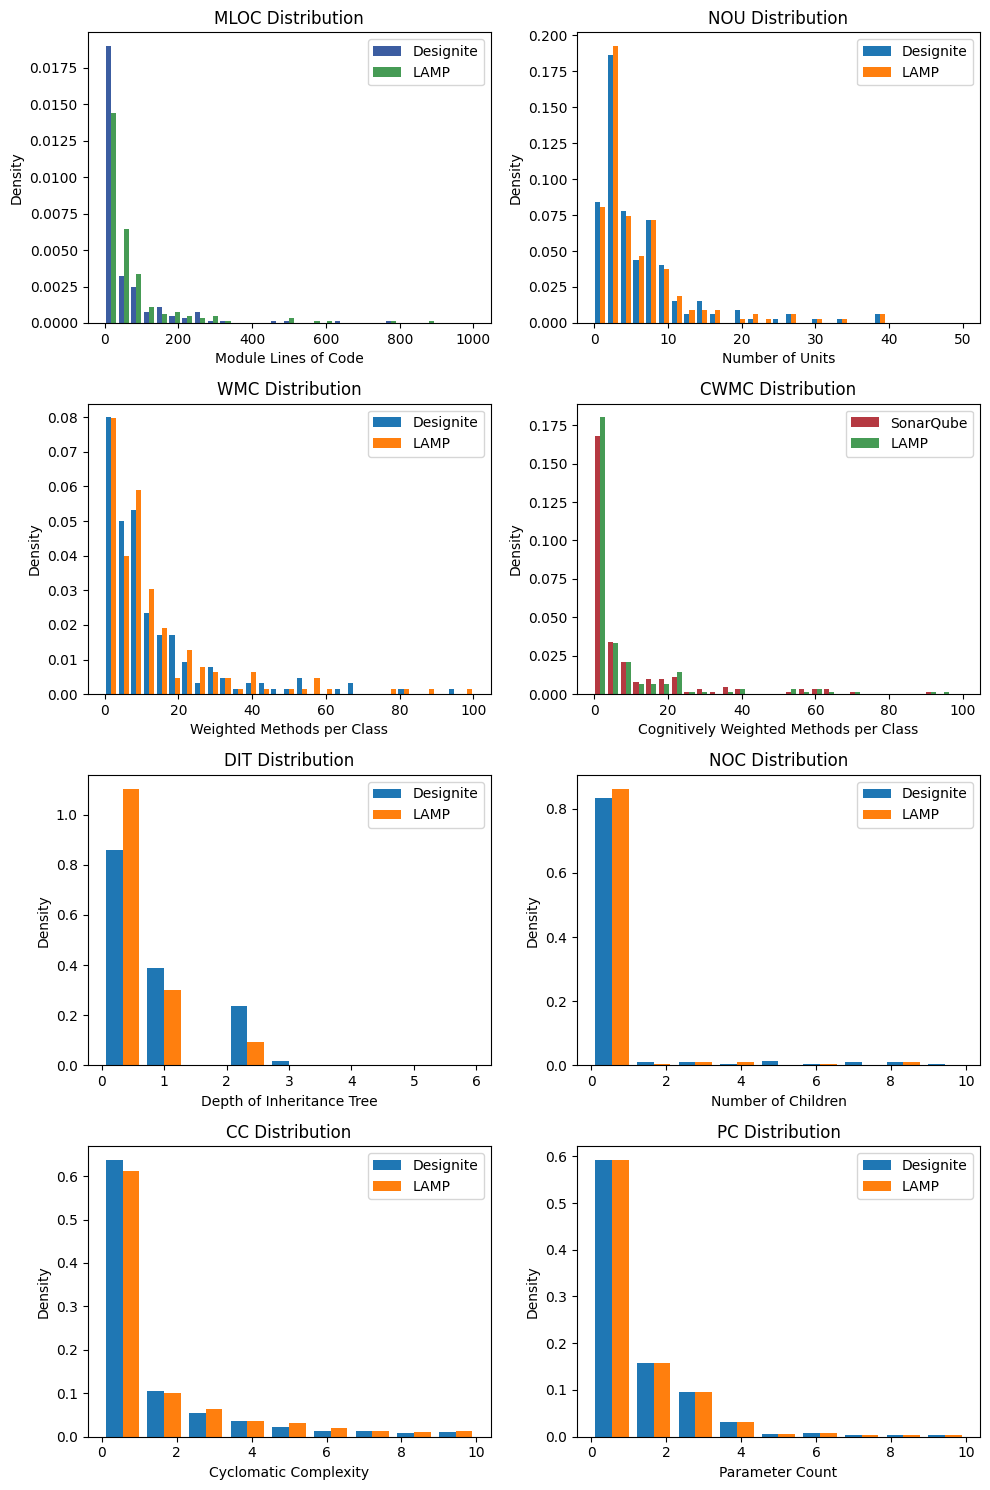

In [372]:
figure.tight_layout()
figure.savefig('images/lottie-metrics.png')
figure

In [373]:
m = m_mods.copy()
u = m_units.copy()
m["DELTA_MLOC"] = (m["D_LOC"] - m["L_MLOC"]).abs()
m["DELTA_WMC"] = (m["D_WMC"] - m["L_WMC"]).abs()
m["DELTA_CWMC"] = (m["S_COCO"] - m["L_CWMC"]).abs()
m["DELTA_DIT"] = (m["D_DIT"] - m["L_DIT"]).abs()
m["DELTA_NOC"] = (m["D_NC"] - m["L_NOC"]).abs()
m["DELTA_NOU"] = (m["D_NOM"] - m["L_NOU"]).abs()

u["DELTA_CC"] = (u["D_CC"] - u["L_CC"]).abs()
u["DELTA_PC"] = (u["D_PC"] - u["L_PC"]).abs()

In [374]:
m

,DeclarableId,D_NOF,D_NOPF,D_NOM,D_NOPM,D_LOC,D_WMC,D_NC,D_DIT,D_LCOM,...,L_NOU,L_LC,S_COCO,S_LOC,DELTA_MLOC,DELTA_WMC,DELTA_CWMC,DELTA_DIT,DELTA_NOC,DELTA_NOU
0,com.airbnb.lottie.LottieTask,5,1,10,5,126,19,0,0,0.200000,...,10,1,19,114,30,5,2,0,0,0
1,com.airbnb.lottie.RenderMode,0,0,0,0,0,0,0,0,-1.000000,...,1,0,5,23,21,7,0,0,0,1
2,com.airbnb.lottie.Lottie,0,0,2,1,19,2,0,0,-1.000000,...,2,0,0,14,7,0,0,0,0,0
3,com.airbnb.lottie.LottieOnCompositionLoadedLis...,0,0,1,0,3,1,0,0,-1.000000,...,1,0,0,4,0,0,0,0,0,0
4,com.airbnb.lottie.LottieComposition,17,0,27,27,247,30,0,0,0.185185,...,27,0,6,259,55,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,com.airbnb.lottie.model.layer.TextLayer,23,0,21,2,517,96,0,1,0.000000,...,21,0,132,535,31,34,0,0,0,0
185,com.airbnb.lottie.model.layer.SolidLayer,6,0,4,3,63,9,0,1,0.000000,...,4,0,8,80,0,2,0,0,0,0
186,com.airbnb.lottie.model.layer.NullLayer,0,0,3,1,11,3,0,1,-1.000000,...,3,0,0,16,0,0,0,0,0,0
187,com.airbnb.lottie.model.layer.ShapeLayer,2,0,6,3,35,8,0,1,0.000000,...,6,0,2,53,1,0,0,0,0,0


In [375]:
u

,DeclarableId,D_LOC,D_CC,D_PC,L_ULOC,L_CC,L_COCO,L_PC,L_LLOC,DELTA_CC,DELTA_PC
0,com.airbnb.lottie.LottieTask://LottieTask,3,1,1,3,1,0,1,0,0,0
1,com.airbnb.lottie.LottieTask://LottieTask,3,1,1,11,4,4,2,0,3,1
2,com.airbnb.lottie.LottieTask://LottieTask,13,2,2,3,1,0,1,0,1,1
3,com.airbnb.lottie.LottieTask://LottieTask,13,2,2,11,4,4,2,0,2,0
4,com.airbnb.lottie.LottieTask://setResult,7,2,1,7,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1540,com.airbnb.lottie.model.layer.Layer://toString,27,7,1,3,1,0,0,0,6,1
1541,com.airbnb.lottie.model.layer.Layer://toString,27,7,1,28,8,9,1,0,1,0
1542,com.airbnb.lottie.model.layer.Layer://isHidden,3,1,0,3,1,0,0,0,0,0
1543,com.airbnb.lottie.model.layer.Layer://getBlurE...,3,1,0,3,1,0,0,0,0,0


In [376]:
def stats(column):
    print(f"mean = {column.mean()}")
    print(f"median = {column.median()}")
    print(f"90% = {column.quantile(0.9)}")
    print(f"95% = {column.quantile(0.95)}")
    print(f"99% = {column.quantile(0.99)}")

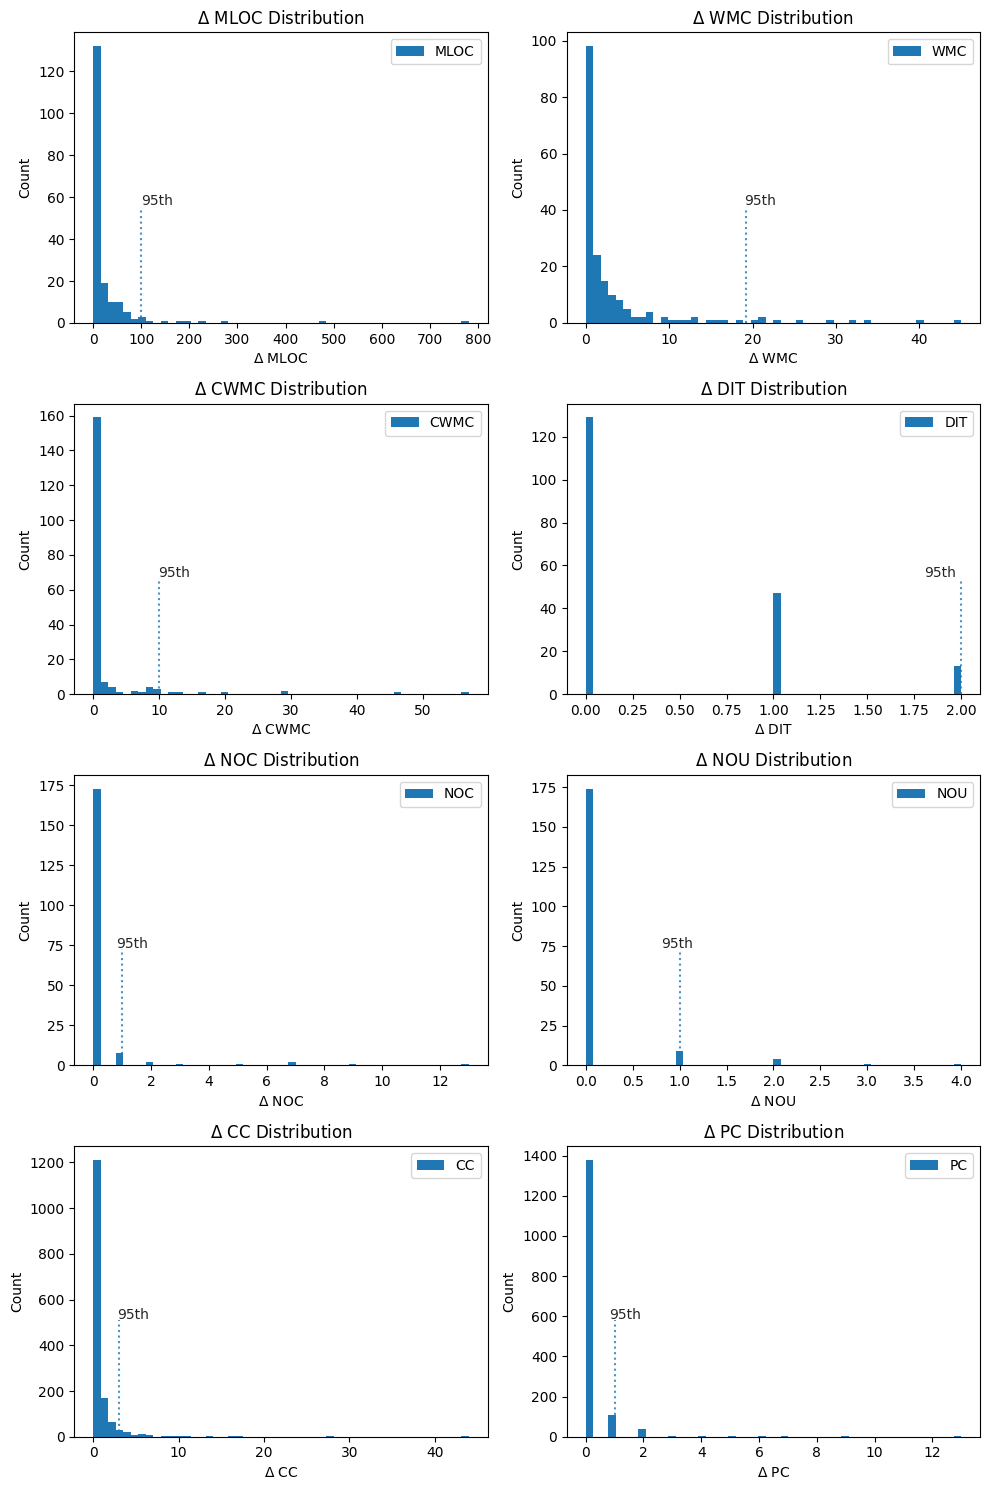

In [377]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(4, 2, figsize=(10, 15))
plt.locator_params(axis="both", integer=True, tight=True)

def plot(subplot, df, metric: str):
    y, x, _ = subplot.hist(df[f"DELTA_{metric}"], bins=50, label=[metric])
    subplot.set(title= fr"$\Delta$ {metric} Distribution", xlabel= fr"$\Delta$ {metric}", ylabel='Count')
    subplot.legend()

    quant_95 = df[f"DELTA_{metric}"].quantile(0.95)
    subplot.axvline(quant_95, alpha=0.8, ymax = 0.4, linestyle = ":")
    subplot.text(quant_95-0.20, y.max() * 0.425, "95th", size = 10, alpha = 0.85)

plot(axis[0, 0], m, "MLOC")
plot(axis[0, 1], m, "WMC")
plot(axis[1, 0], m, "CWMC")
plot(axis[1, 1], m, "DIT")
plot(axis[2, 0], m, "NOC")
plot(axis[2, 1], m, "NOU")
plot(axis[3, 0], u, "CC")
plot(axis[3, 1], u, "PC")

figure.tight_layout()
figure.savefig('images/lottie-distributions.png')

In [378]:
def get_outliers(df, metric: str):
    outliers = df[df[f"DELTA_{metric}"] >= df[f"DELTA_{metric}"].quantile(0.95)]
    return outliers

In [379]:
get_outliers(m, "MLOC").loc[:, ["DeclarableId", "D_LOC", "L_MLOC", "DELTA_MLOC"]].sort_values(by="DELTA_MLOC", ascending=False)

,DeclarableId,D_LOC,L_MLOC,DELTA_MLOC
135,com.airbnb.lottie.parser.moshi.JsonUtf8Reader,0,781,781
181,com.airbnb.lottie.model.layer.BaseLayer,0,484,484
121,com.airbnb.lottie.parser.KeyframeParser,0,280,280
15,com.airbnb.lottie.LottieDrawable,1108,887,221
9,com.airbnb.lottie.LottieAnimationView,792,594,198
128,com.airbnb.lottie.parser.LottieCompositionMosh...,0,186,186
94,com.airbnb.lottie.parser.LayerParser,0,146,146
19,com.airbnb.lottie.LottieCompositionFactory,454,339,115
14,com.airbnb.lottie.LottieProperty,148,43,105
104,com.airbnb.lottie.parser.AnimatableTransformPa...,0,102,102


In [380]:
get_outliers(m, "WMC").loc[:, ["DeclarableId", "D_WMC", "L_WMC", "DELTA_WMC"]].sort_values(by="DeclarableId", ascending=False)

,DeclarableId,D_WMC,L_WMC,DELTA_WMC
84,com.airbnb.lottie.utils.LottieValueAnimator,55,78,23
132,com.airbnb.lottie.parser.moshi.LinkedHashTreeMap,64,109,45
135,com.airbnb.lottie.parser.moshi.JsonUtf8Reader,232,272,40
121,com.airbnb.lottie.parser.KeyframeParser,55,81,26
184,com.airbnb.lottie.model.layer.TextLayer,96,130,34
78,com.airbnb.lottie.animation.keyframe.Transform...,67,99,32
58,com.airbnb.lottie.animation.content.RoundedCor...,19,39,20
63,com.airbnb.lottie.animation.content.BaseStroke...,66,87,21
15,com.airbnb.lottie.LottieDrawable,221,250,29
19,com.airbnb.lottie.LottieCompositionFactory,80,101,21


In [381]:
get_outliers(u, "CC").loc[:, ["DeclarableId", "D_CC", "L_CC", "DELTA_CC"]].sort_values(by="DeclarableId", ascending=False)

,DeclarableId,D_CC,L_CC,DELTA_CC
899,com.airbnb.lottie.utils.Utils://isNetworkExcep...,1,7,6
886,com.airbnb.lottie.utils.Utils://createPath,2,6,4
891,com.airbnb.lottie.utils.Utils://applyTrimPathI...,2,13,11
892,com.airbnb.lottie.utils.Utils://applyTrimPathI...,10,3,7
893,com.airbnb.lottie.utils.Utils://applyTrimPathI...,10,13,3
...,...,...,...,...
367,com.airbnb.lottie.LottieCompositionFactory://f...,1,4,3
67,com.airbnb.lottie.LottieAnimationView://unsche...,3,7,4
71,com.airbnb.lottie.LottieAnimationView://onRest...,9,12,3
90,com.airbnb.lottie.LottieAnimationView://fromRa...,2,5,3


In [382]:
get_outliers(m, "CWMC").loc[:, ["DeclarableId", "S_COCO", "L_CWMC", "DELTA_CWMC"]].sort_values(by="DELTA_CWMC", ascending=False)

,DeclarableId,S_COCO,L_CWMC,DELTA_CWMC
94,com.airbnb.lottie.parser.LayerParser,63,6,57
135,com.airbnb.lottie.parser.moshi.JsonUtf8Reader,268,222,46
108,com.airbnb.lottie.parser.GradientStrokeParser,35,6,29
132,com.airbnb.lottie.parser.moshi.LinkedHashTreeMap,162,133,29
106,com.airbnb.lottie.parser.ShapeStrokeParser,23,3,20
128,com.airbnb.lottie.parser.LottieCompositionMosh...,37,21,16
98,com.airbnb.lottie.parser.FontCharacterParser,15,2,13
104,com.airbnb.lottie.parser.AnimatableTransformPa...,34,22,12
73,com.airbnb.lottie.animation.keyframe.BaseKeyfr...,31,21,10
121,com.airbnb.lottie.parser.KeyframeParser,125,115,10


In [383]:
u[u["DeclarableId"].str.startswith("com.airbnb.lottie.parser.LayerParser" )].loc[:, ["DeclarableId", "L_COCO"]]

,DeclarableId,L_COCO
950,com.airbnb.lottie.parser.LayerParser://LayerPa...,0
951,com.airbnb.lottie.parser.LayerParser://parse,0
952,com.airbnb.lottie.parser.LayerParser://parse,6
953,com.airbnb.lottie.parser.LayerParser://parse,0
954,com.airbnb.lottie.parser.LayerParser://parse,6


In [384]:
get_outliers(m, "DIT").loc[:, ["DeclarableId", "D_DIT", "L_DIT", "DELTA_DIT"]].sort_values(by="DELTA_DIT", ascending=False)

,DeclarableId,D_DIT,L_DIT,DELTA_DIT
45,com.airbnb.lottie.animation.content.FillContent,2,0,2
46,com.airbnb.lottie.animation.content.RectangleC...,2,0,2
47,com.airbnb.lottie.animation.content.MergePaths...,2,0,2
49,com.airbnb.lottie.animation.content.StrokeContent,3,1,2
50,com.airbnb.lottie.animation.content.PolystarCo...,2,0,2
52,com.airbnb.lottie.animation.content.ShapeContent,2,0,2
55,com.airbnb.lottie.animation.content.GradientSt...,3,1,2
56,com.airbnb.lottie.animation.content.EllipseCon...,2,0,2
58,com.airbnb.lottie.animation.content.RoundedCor...,2,0,2
59,com.airbnb.lottie.animation.content.ContentGroup,2,0,2


In [385]:
get_outliers(m, "NOC").loc[:, ["DeclarableId", "D_NC", "L_NOC", "DELTA_NOC"]].sort_values(by="DELTA_NOC", ascending=False)

,DeclarableId,D_NC,L_NOC,DELTA_NOC
167,com.airbnb.lottie.model.content.ContentModel,13,0,13
116,com.airbnb.lottie.parser.ValueParser,9,0,9
53,com.airbnb.lottie.animation.content.KeyPathEle...,7,0,7
57,com.airbnb.lottie.animation.content.PathContent,7,0,7
44,com.airbnb.lottie.animation.content.DrawingCon...,5,0,5
152,com.airbnb.lottie.model.animatable.AnimatableV...,3,0,3
51,com.airbnb.lottie.animation.content.GreedyContent,2,0,2
65,com.airbnb.lottie.animation.content.Content,5,3,2
8,com.airbnb.lottie.LottieListener,1,0,1
10,com.airbnb.lottie.Cancellable,1,0,1


In [389]:
m.loc[:, ["DeclarableId", "L_NOC"]].sort_values(by="L_NOC", ascending=False)

,DeclarableId,L_NOC
71,com.airbnb.lottie.animation.keyframe.KeyframeA...,8
150,com.airbnb.lottie.model.animatable.BaseAnimata...,8
181,com.airbnb.lottie.model.layer.BaseLayer,6
37,com.airbnb.lottie.value.LottieValueCallback,4
73,com.airbnb.lottie.animation.keyframe.BaseKeyfr...,4
...,...,...
67,com.airbnb.lottie.animation.keyframe.FloatKeyf...,0
68,com.airbnb.lottie.animation.keyframe.GradientC...,0
69,com.airbnb.lottie.animation.keyframe.PointKeyf...,0
70,com.airbnb.lottie.animation.keyframe.MaskKeyfr...,0


In [390]:
get_outliers(m, "NOU").loc[:, ["DeclarableId", "D_NOM", "L_NOU", "DELTA_NOU"]].sort_values(by="DELTA_NOU", ascending=False)

,DeclarableId,D_NOM,L_NOU,DELTA_NOU
87,com.airbnb.lottie.utils.Utils,20,16,4
23,com.airbnb.lottie.network.FileExtension,0,3,3
9,com.airbnb.lottie.LottieAnimationView,104,102,2
15,com.airbnb.lottie.LottieDrawable,114,112,2
176,com.airbnb.lottie.model.content.PolystarShape,15,13,2
178,com.airbnb.lottie.model.content.ShapeStroke,14,12,2
1,com.airbnb.lottie.RenderMode,0,1,1
13,com.airbnb.lottie.PerformanceTracker,8,7,1
21,com.airbnb.lottie.L,12,11,1
66,com.airbnb.lottie.animation.keyframe.TextKeyfr...,4,3,1


In [403]:
u.loc[:, ["DeclarableId", "D_PC", "L_PC", "DELTA_PC"]].sort_values(by=["DELTA_PC"], ascending=False).replace(to_replace=0, value=np.nan).dropna().drop_duplicates(subset="DeclarableId", keep=False)

,DeclarableId,D_PC,L_PC,DELTA_PC
717,com.airbnb.lottie.animation.keyframe.TextKeyfr...,1.0,2.0,1.0
